<a href="https://colab.research.google.com/github/ifis0702/Cifar100Classification/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/Test

/content/drive/MyDrive/Test


In [2]:
!ls 

cifar-100-images  data	LastDance.ipynb  ResNet.ipynb


In [3]:
!pip install opendatasets --upgrade -q

In [4]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

In [61]:
#tai file json tu kaggle ve:
#B1: vo account
#B2: creat new 
#B3: COPY KEY VA USER NAME

# dataset_url = 'https://www.kaggle.com/minbavel/cifar-100-images'
# od.download(dataset_url)

In [5]:
data_dir = './cifar-100-images/CIFAR100'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes[:10])
print(len(classes))

['TEST', 'TRAIN']
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']
100


In [6]:
# Kiem tra cac class don le
man_file=os.listdir(data_dir+"/TRAIN/man")
print("NO. of Training examples for Man:",len(man_file))
print(man_file[:5])

NO. of Training examples for Man: 500
['abel_s_000001.png', 'abel_s_000011.png', 'abel_s_000056.png', 'abel_s_000081.png', 'abel_s_000083.png']


In [7]:
# Kiem tra xem co bao nhieu hinh trong tung class file TRAIN
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+"/TRAIN/"+i))
print(di)


{'apple': 500, 'aquarium_fish': 500, 'baby': 500, 'bear': 500, 'beaver': 500, 'bed': 500, 'bee': 500, 'beetle': 500, 'bicycle': 500, 'bottle': 500, 'bowl': 500, 'boy': 500, 'bridge': 500, 'bus': 500, 'butterfly': 500, 'camel': 500, 'can': 500, 'castle': 500, 'caterpillar': 500, 'cattle': 500, 'chair': 500, 'chimpanzee': 500, 'clock': 500, 'cloud': 500, 'cockroach': 500, 'couch': 500, 'crab': 500, 'crocodile': 500, 'cup': 500, 'dinosaur': 500, 'dolphin': 500, 'elephant': 500, 'flatfish': 500, 'forest': 500, 'fox': 500, 'girl': 500, 'hamster': 500, 'house': 500, 'kangaroo': 500, 'keyboard': 500, 'lamp': 500, 'lawn_mower': 500, 'leopard': 500, 'lion': 500, 'lizard': 500, 'lobster': 500, 'man': 500, 'maple_tree': 500, 'motorcycle': 500, 'mountain': 500, 'mouse': 500, 'mushroom': 500, 'oak_tree': 500, 'orange': 500, 'orchid': 500, 'otter': 500, 'palm_tree': 500, 'pear': 500, 'pickup_truck': 500, 'pine_tree': 500, 'plain': 500, 'plate': 500, 'poppy': 500, 'porcupine': 500, 'possum': 500, 'ra

# Prepare Data

## Normalize

In [8]:
average = torch.Tensor([0, 0, 0])
standard_dev = torch.Tensor([0, 0, 0])
images = ImageFolder(data_dir+'/TRAIN', tt.ToTensor())
# print(len(images))
for image in images:
    average += image[0].mean([1,2])
    standard_dev += image[0].std([1,2])
average / len(images) , standard_dev / len(images)

(tensor([0.5071, 0.4865, 0.4409]), tensor([0.2009, 0.1984, 0.2023]))

In [9]:
#Data transform (normalaztion & data augmentation)
stats = ((average / len(images)).tolist(), (standard_dev / len(images)).tolist())
print(stats)
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
print(train_tfms)
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
print(valid_tfms)

([0.5070759654045105, 0.4865495562553406, 0.44091781973838806], [0.2008967399597168, 0.19844283163547516, 0.20229755342006683])
Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5070759654045105, 0.4865495562553406, 0.44091781973838806], std=[0.2008967399597168, 0.19844283163547516, 0.20229755342006683])
)
Compose(
    ToTensor()
    Normalize(mean=[0.5070759654045105, 0.4865495562553406, 0.44091781973838806], std=[0.2008967399597168, 0.19844283163547516, 0.20229755342006683])
)


In [10]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

In [11]:
batch_size = 400
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)

In [12]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


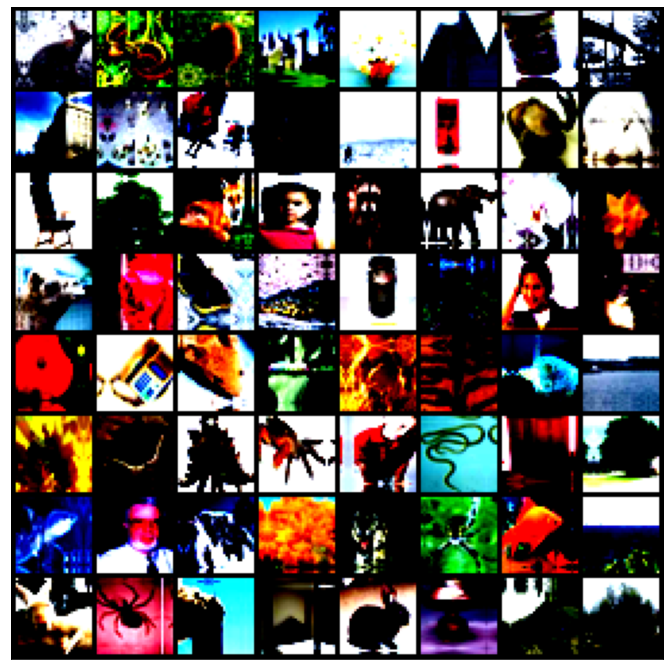

In [13]:
show_batch(train_dl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


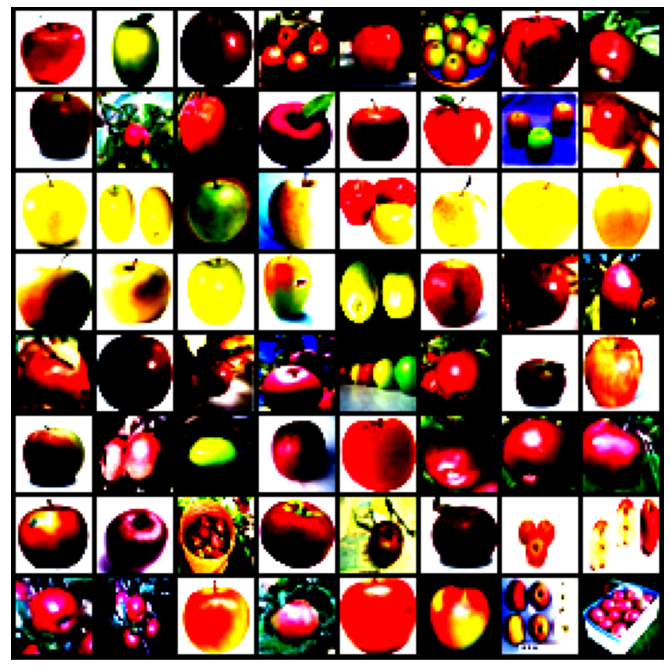

In [14]:
show_batch(valid_dl)

## USING GPU FOR TRAIN

In [15]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')
    
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list,tuple)):
      return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
      self.dl = dl
      self.device = device
      
  def __iter__(self):
      """Yield a batch of data after moving it to device"""
      for b in self.dl: 
          yield to_device(b, self.device)

  def __len__(self):
      """Number of batches"""
      return len(self.dl)

In [16]:
device = get_default_device()
device

device(type='cuda')

In [17]:
# Transfering data to the device in use (In our case GPU)
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [18]:
train_dl.__len__()

125

In [19]:
valid_dl.__len__()

13

In [20]:
valid_dl.__len__()/train_dl.__len__()

0.104

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [22]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64) # 3 x 32 x 32 -> 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True) # 64 x 32 x 32 -> 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 128 x 16 x 16 -> 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 16 x 16 -> 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True) # 256 x 8 x 8 -> 512 x 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # 512 x 4 x 4 -> 512 x 4 x 4
        self.conv5 = conv_block(512, 1028, pool=True) # 512 x 4 x 4 -> 1028 x 2 x 2
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))  # 1028 x 2 x 2 -> 1028 x 2 x 2
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 1028 x 1 x 1
                                        nn.Flatten(), # 1028 
                                        nn.Linear(1028, num_classes)) # 1028 -> 100
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

In [23]:
model = to_device(ResNet9(3, 100), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Training the model

In [24]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [25]:
history = [evaluate(model, valid_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.010673075914382935, 'val_loss': 4.605716705322266}]

In [26]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay =1e-4
opt_func = torch.optim.Adam

In [28]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00278, train_loss: 3.6860, val_loss: 4.1545, val_acc: 0.1727
Epoch [1], last_lr: 0.00759, train_loss: 2.9899, val_loss: 3.0023, val_acc: 0.2633
Epoch [2], last_lr: 0.01000, train_loss: 2.3613, val_loss: 2.6451, val_acc: 0.3319
Epoch [3], last_lr: 0.00950, train_loss: 1.9900, val_loss: 2.0524, val_acc: 0.4544
Epoch [4], last_lr: 0.00812, train_loss: 1.7255, val_loss: 2.1533, val_acc: 0.4509
Epoch [5], last_lr: 0.00611, train_loss: 1.4597, val_loss: 1.7621, val_acc: 0.5237
Epoch [6], last_lr: 0.00389, train_loss: 1.2095, val_loss: 1.5254, val_acc: 0.5826
Epoch [7], last_lr: 0.00188, train_loss: 0.9505, val_loss: 1.1876, val_acc: 0.6593
Epoch [8], last_lr: 0.00050, train_loss: 0.6980, val_loss: 1.0442, val_acc: 0.7005
Epoch [9], last_lr: 0.00000, train_loss: 0.5308, val_loss: 1.0119, val_acc: 0.7086
CPU times: user 2min 48s, sys: 1min 13s, total: 4min 2s
Wall time: 21min 1s


In [29]:
%%time
history += fit_one_cycle(epochs, 0.001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00028, train_loss: 0.5040, val_loss: 1.0139, val_acc: 0.7092
Epoch [1], last_lr: 0.00076, train_loss: 0.5179, val_loss: 1.1034, val_acc: 0.6847
Epoch [2], last_lr: 0.00100, train_loss: 0.5507, val_loss: 1.1889, val_acc: 0.6682
Epoch [3], last_lr: 0.00095, train_loss: 0.5066, val_loss: 1.2226, val_acc: 0.6676
Epoch [4], last_lr: 0.00081, train_loss: 0.4276, val_loss: 1.1875, val_acc: 0.6744
Epoch [5], last_lr: 0.00061, train_loss: 0.3342, val_loss: 1.1136, val_acc: 0.6984
Epoch [6], last_lr: 0.00039, train_loss: 0.2410, val_loss: 1.0639, val_acc: 0.7133
Epoch [7], last_lr: 0.00019, train_loss: 0.1713, val_loss: 1.0496, val_acc: 0.7236
Epoch [8], last_lr: 0.00005, train_loss: 0.1310, val_loss: 1.0367, val_acc: 0.7260
Epoch [9], last_lr: 0.00000, train_loss: 0.1159, val_loss: 1.0366, val_acc: 0.7272
CPU times: user 3min 16s, sys: 1min 50s, total: 5min 6s
Wall time: 20min 49s


In [30]:
%%time
history += fit_one_cycle(5, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00008, train_loss: 0.1145, val_loss: 1.0375, val_acc: 0.7259
Epoch [1], last_lr: 0.00010, train_loss: 0.1112, val_loss: 1.0499, val_acc: 0.7256
Epoch [2], last_lr: 0.00006, train_loss: 0.0997, val_loss: 1.0484, val_acc: 0.7310
Epoch [3], last_lr: 0.00002, train_loss: 0.0925, val_loss: 1.0471, val_acc: 0.7287
Epoch [4], last_lr: 0.00000, train_loss: 0.0839, val_loss: 1.0480, val_acc: 0.7298
CPU times: user 1min 36s, sys: 55 s, total: 2min 31s
Wall time: 10min 19s


In [31]:
%%time
history += fit_one_cycle(5, 0.00001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00001, train_loss: 0.0851, val_loss: 1.0481, val_acc: 0.7294
Epoch [1], last_lr: 0.00001, train_loss: 0.0823, val_loss: 1.0468, val_acc: 0.7287
Epoch [2], last_lr: 0.00001, train_loss: 0.0838, val_loss: 1.0462, val_acc: 0.7302
Epoch [3], last_lr: 0.00000, train_loss: 0.0813, val_loss: 1.0476, val_acc: 0.7302
Epoch [4], last_lr: 0.00000, train_loss: 0.0826, val_loss: 1.0486, val_acc: 0.7303
CPU times: user 1min 29s, sys: 43.6 s, total: 2min 13s
Wall time: 10min 26s


In [33]:
%%time
history += fit_one_cycle(10, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00003, train_loss: 0.0798, val_loss: 1.0459, val_acc: 0.7310
Epoch [1], last_lr: 0.00008, train_loss: 0.0808, val_loss: 1.0606, val_acc: 0.7283
Epoch [2], last_lr: 0.00010, train_loss: 0.0802, val_loss: 1.0650, val_acc: 0.7314
Epoch [3], last_lr: 0.00010, train_loss: 0.0747, val_loss: 1.0765, val_acc: 0.7289
Epoch [4], last_lr: 0.00008, train_loss: 0.0684, val_loss: 1.0806, val_acc: 0.7278
Epoch [5], last_lr: 0.00006, train_loss: 0.0620, val_loss: 1.0820, val_acc: 0.7281
Epoch [6], last_lr: 0.00004, train_loss: 0.0558, val_loss: 1.0820, val_acc: 0.7292
Epoch [7], last_lr: 0.00002, train_loss: 0.0517, val_loss: 1.0877, val_acc: 0.7297
Epoch [8], last_lr: 0.00000, train_loss: 0.0490, val_loss: 1.0864, val_acc: 0.7309
Epoch [9], last_lr: 0.00000, train_loss: 0.0484, val_loss: 1.0871, val_acc: 0.7308
CPU times: user 3min 10s, sys: 1min 39s, total: 4min 50s
Wall time: 21min 50s


In [34]:
# Plotted the accuracy Graph
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

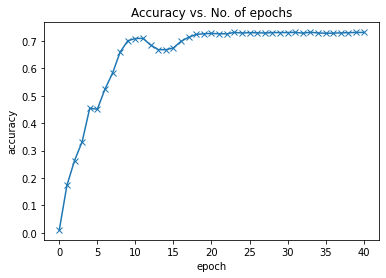

In [35]:
plot_accuracies(history)

In [36]:
# Training and Validation loss graph
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

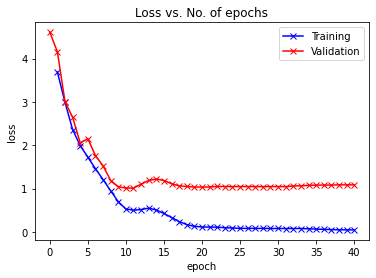

In [37]:
plot_losses(history)

In [38]:
# Learning Rate Graph
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

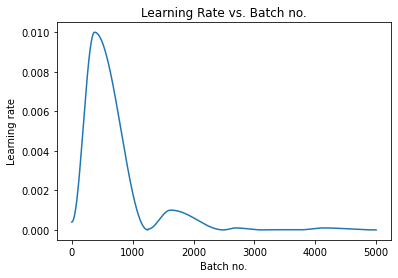

In [39]:
plot_lrs(history)

## Prediction and testing of MODEL

In [41]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)

In [43]:
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

In [44]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: aquarium_fish , Predicted: aquarium_fish


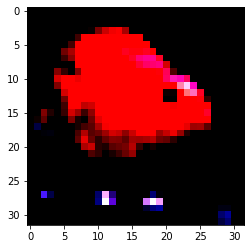

In [47]:
img, label = test_dataset[117]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: beaver , Predicted: porcupine


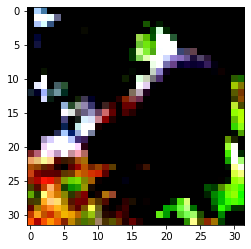

In [45]:
img, label = test_dataset[400]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: apple , Predicted: apple


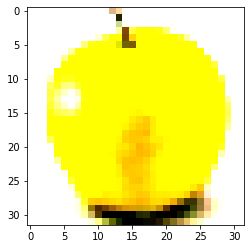

In [46]:
img, label = test_dataset[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: baby , Predicted: baby


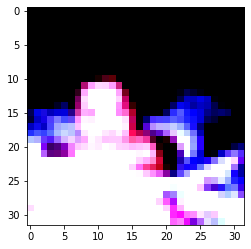

In [48]:
img, label = test_dataset[210]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bed , Predicted: couch


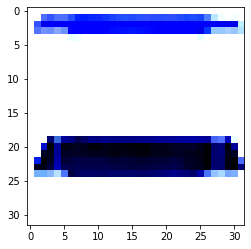

In [49]:
img, label = test_dataset[590]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: apple , Predicted: apple


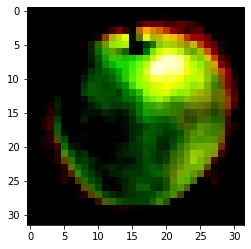

In [51]:
img, label = test_dataset[18]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: aquarium_fish , Predicted: aquarium_fish


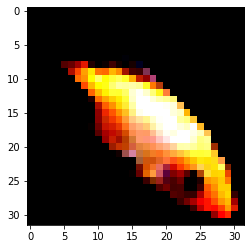

In [53]:
img, label = test_dataset[129]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [59]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.730769157409668, 'val_loss': 1.08706796169281}

## Save Model

In [54]:
torch.save(model.state_dict(), 'cifar100-model.pth')

In [56]:
model2 = to_device(ResNet9(3, 100), device)

In [57]:
model2.load_state_dict(torch.load('cifar100-model.pth'))

<All keys matched successfully>

In [60]:
evaluate(model2, test_loader)

{'val_acc': 0.730769157409668, 'val_loss': 1.08706796169281}